In [0]:
!sudo pip3 install seaborn==0.9.0

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sampleSubmission.csv")

In [0]:
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [0]:
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [0]:
sample_sub.head()

,id,price
0,0,12345.67
1,1,12345.67
2,2,12345.67
3,3,12345.67
4,4,12345.67


In [0]:
train.count()

id         19176
carat      19176
cut        19176
color      19176
clarity    19176
x          19176
y          19176
z          19176
depth      19176
table      19176
price      19176
dtype: int64

In [0]:
train.describe()

,id,carat,x,y,z,depth,table,price
count,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000,19176.000000
mean,29587.500000,0.794534,5.725630,5.728849,3.534406,61.739372,57.465702,3904.592981
std,5535.778717,0.470361,1.114391,1.122295,0.690202,1.415997,2.232158,3962.031384
min,20000.000000,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,326.000000
25%,24793.750000,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,949.000000
50%,29587.500000,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2398.000000
75%,34381.250000,1.040000,6.530000,6.530000,4.030000,62.500000,59.000000,5280.250000
max,39175.000000,4.500000,10.230000,31.800000,6.720000,72.200000,76.000000,18806.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
id         19176 non-null int64
carat      19176 non-null float64
cut        19176 non-null object
color      19176 non-null object
clarity    19176 non-null object
x          19176 non-null float64
y          19176 non-null float64
z          19176 non-null float64
depth      19176 non-null float64
table      19176 non-null float64
price      19176 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 1.6+ MB


In [0]:
train.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [0]:
map_cut = {"Fair":1,"Good":2,"Very Good":3, "Premium":4, "Ideal":5}
train = train.replace({"cut":map_cut})
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,3,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,5,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,5,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,5,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,4,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [0]:
test = test.replace({"cut":map_cut})
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,4,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,3,H,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,5,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,5,I,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,5,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [0]:
train.color.unique()

array(['G', 'F', 'H', 'I', 'J', 'E', 'D'], dtype=object)

In [0]:
map_color = {'G':4, 'F':5, 'H':3, 'I':2, 'J':1, 'E':6, 'D':7}
train = train.replace({"color":map_color})
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,3,4,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,5,5,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,5,5,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,5,3,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,4,2,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [0]:
test = test.replace({"color":map_color})
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,4,4,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,3,3,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,5,7,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,5,2,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,5,2,VVS2,5.63,5.68,3.51,62.1,58.0


In [0]:
train.clarity.unique()

array(['VVS2', 'SI1', 'VVS1', 'VS2', 'IF', 'SI2', 'I1', 'VS1'],
      dtype=object)

In [0]:
map_clarity = {"I1":1, "SI2":2, "SI1":2, "VS2":3, "VS1":3, "VVS2":4, "VVS1":4, "IF":5}
train = train.replace({"clarity":map_clarity})
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,3,4,4,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,5,5,2,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,5,5,4,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,5,3,4,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,4,2,4,4.41,4.47,2.76,62.2,59.0,579


In [0]:
test = test.replace({"clarity":map_clarity})
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,4,4,2,7.75,7.68,4.84,62.7,58.0
1,1,1.11,3,3,2,6.63,6.65,4.11,61.9,58.0
2,2,0.52,5,7,4,5.19,5.22,3.20,61.5,55.0
3,3,1.05,5,2,3,6.52,6.50,4.05,62.2,56.0
4,4,0.70,5,2,4,5.63,5.68,3.51,62.1,58.0


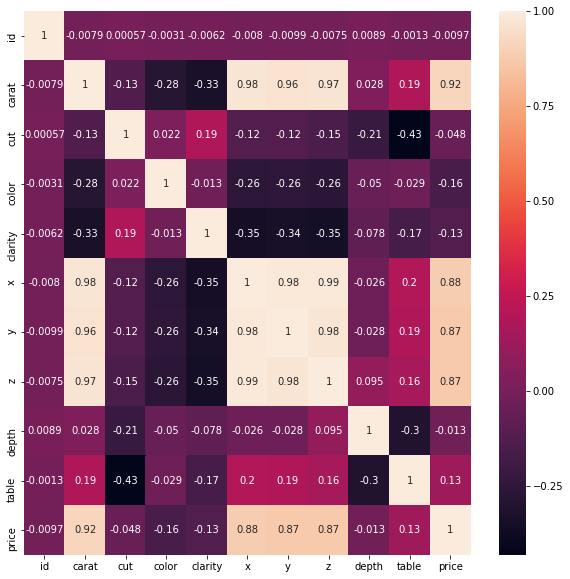

In [0]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches


cor = train.corr()
sb.heatmap(cor, annot=True, ax=ax)

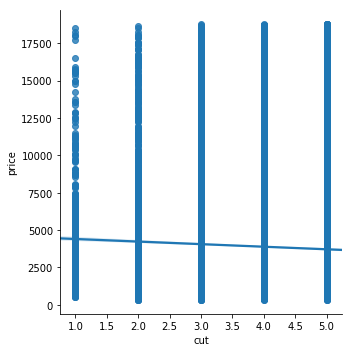

In [0]:
sb.lmplot(data=train, x='cut', y='price')

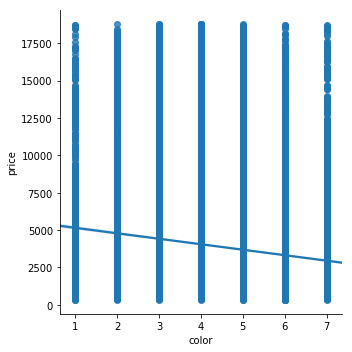

In [0]:
sb.lmplot(data=train, x='color', y='price')

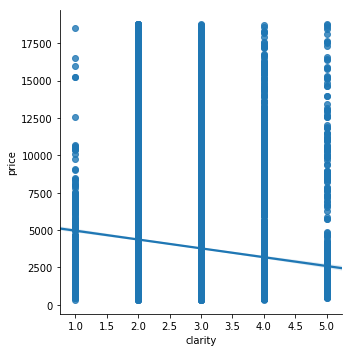

In [0]:
sb.lmplot(data=train, x='clarity', y='price')

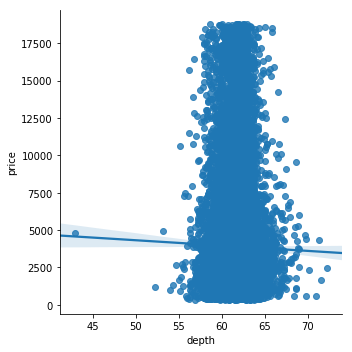

In [0]:
sb.lmplot(data=train, x='depth', y='price')

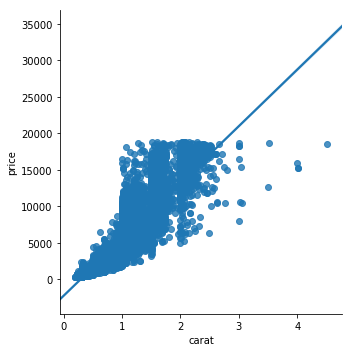

In [0]:
sb.lmplot(data=train, x='carat', y='price')

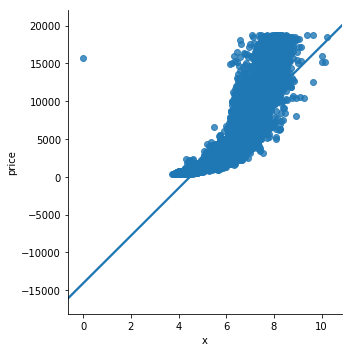

In [0]:
sb.lmplot(data=train, x='x', y='price')

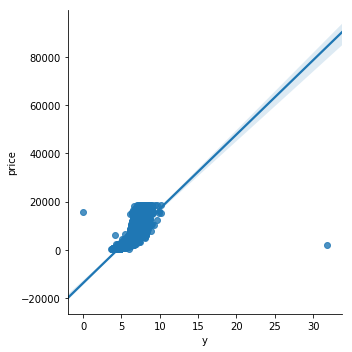

In [0]:
sb.lmplot(data=train, x='y', y='price')

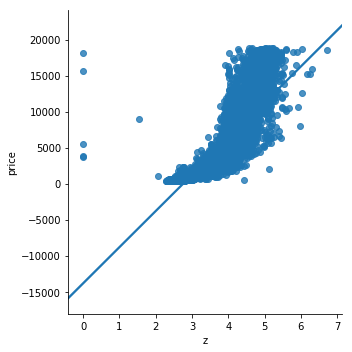

In [0]:
sb.lmplot(data=train, x='z', y='price')

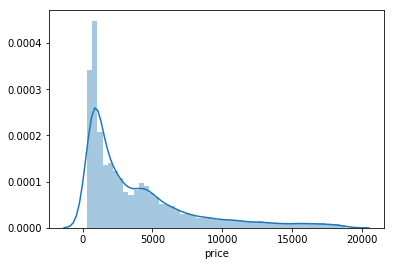

In [0]:
sb.distplot(train['price'])

In [0]:
train.query('price <= 0.1')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,log_price


In [0]:
train['log_price'] = np.log(train['price'])
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price,log_price
0,20000,0.35,3,4,4,4.44,4.48,2.80,62.8,58.0,798,6.682109
1,20001,0.70,5,5,2,5.66,5.69,3.55,62.6,56.0,2089,7.644441
2,20002,0.32,5,5,4,4.42,4.38,2.70,61.4,56.0,990,6.897705
3,20003,0.30,5,3,4,4.32,4.35,2.67,61.7,54.2,631,6.447306
4,20004,0.33,4,2,4,4.41,4.47,2.76,62.2,59.0,579,6.361302


In [0]:
train['log_carat'] = np.log(train['carat'])
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price,log_price,log_carat
0,20000,0.35,3,4,4,4.44,4.48,2.80,62.8,58.0,798,6.682109,-1.049822
1,20001,0.70,5,5,2,5.66,5.69,3.55,62.6,56.0,2089,7.644441,-0.356675
2,20002,0.32,5,5,4,4.42,4.38,2.70,61.4,56.0,990,6.897705,-1.139434
3,20003,0.30,5,3,4,4.32,4.35,2.67,61.7,54.2,631,6.447306,-1.203973
4,20004,0.33,4,2,4,4.41,4.47,2.76,62.2,59.0,579,6.361302,-1.108663


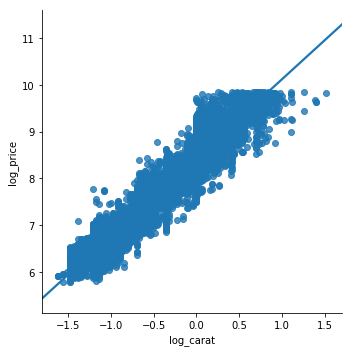

In [0]:
sb.lmplot(data=train, x='log_carat', y='log_price')

In [0]:
sb.distplot(train['log_price'])

In [0]:
train['log_x'] = np.log(train['x'] + 1)
train['log_y'] = np.log(train['y'] + 1)
train['log_z'] = np.log(train['z'] + 1)


train.head()

In [0]:
sb.distplot(train['log_x'])

In [0]:
sb.distplot(train['x'])

In [0]:
sb.distplot(train['log_y'])

In [0]:
sb.distplot(train['y'])

In [0]:
sb.distplot(train['log_z'])

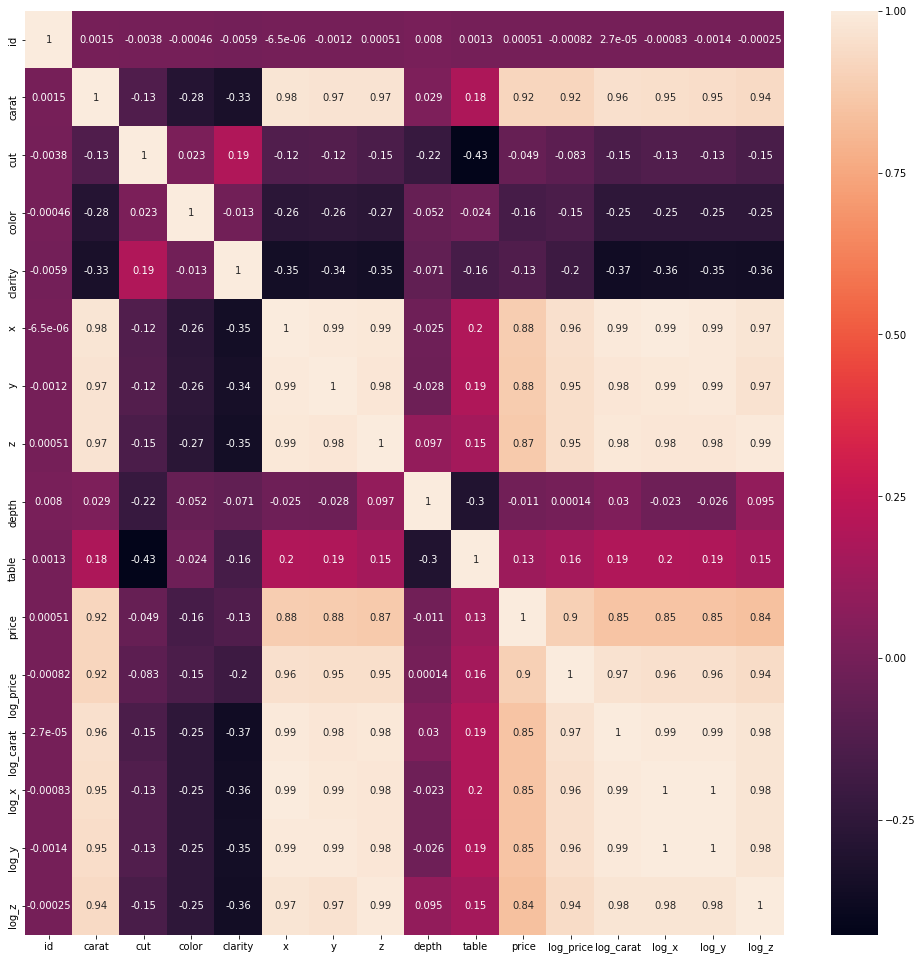

In [0]:
fig, ax = plt.subplots(figsize=(17,17))         # Sample figsize in inches


cor = train.corr()
sb.heatmap(cor, annot=True, ax=ax)

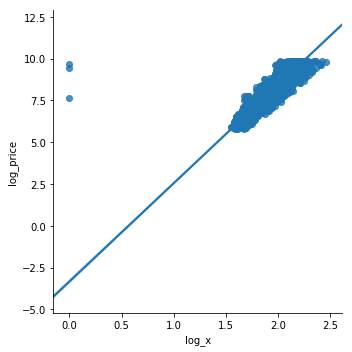

In [0]:
sb.lmplot(data=train, x='log_x', y='log_price')

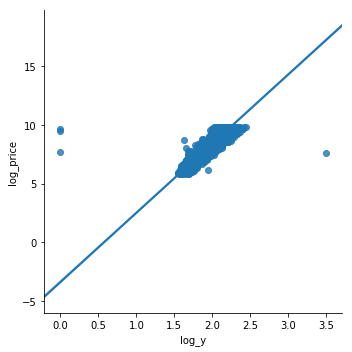

In [0]:
sb.lmplot(data=train, x='log_y', y='log_price')

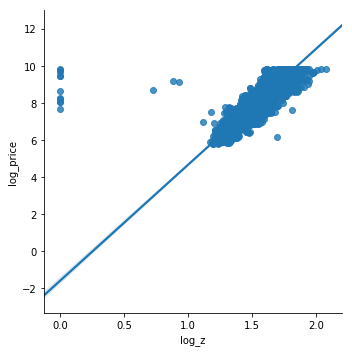

In [0]:
sb.lmplot(data=train, x='log_z', y='log_price')

In [0]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [0]:
X = train[['log_carat','cut','color', 'clarity', 'log_x', 'log_y', 'log_z','depth', 'table']]
X.head()

,log_carat,cut,color,clarity,log_x,log_y,log_z,depth,table
0,-1.049822,3,4,4,1.693779,1.701105,1.335001,62.8,58.0
1,-0.356675,5,5,2,1.896119,1.900614,1.515127,62.6,56.0
2,-1.139434,5,5,4,1.690096,1.682688,1.308333,61.4,56.0
3,-1.203973,5,3,4,1.671473,1.677097,1.300192,61.7,54.2
4,-1.108663,4,2,4,1.688249,1.699279,1.324419,62.2,59.0


In [0]:
Y = train[['log_price']]
Y.head()

,log_price
0,6.682109
1,7.644441
2,6.897705
3,6.447306
4,6.361302


In [0]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [0]:
mGradientBoostingRegressor, mRandomForestRegressor = GradientBoostingRegressor(), RandomForestRegressor()

In [0]:
cv = KFold(n_splits=10)
SEED = 301
np.random.seed(SEED)



def teste_modelo(modelo, dadosx, dadosy):
  nome = ""
  model = str(modelo)
  for i in range(len(model)):
    if model[i] != "(":
      nome = model[0:i+1]
    else:
      results = cross_validate(modelo, dadosx, dadosy, cv = cv, return_train_score=True)
      print("Resultados para o modelo : {} - {}".format(nome, results['test_score'].mean()))


In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
rfr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
teste_modelo(rfr,X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

Resultados para o modelo : RandomForestRegressor - 0.9872404102679775


In [0]:
teste_modelo(gbr)

TypeError: ignored

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR

mlreg = LinearRegression()

In [0]:
teste_modelo(mlreg)

In [0]:
espaco_de_parametros_forest = {
    "n_estimators" : range(1,30),
    "max_depth" : range(1,256),
    "min_samples_split" : range(2,256),
    "min_samples_leaf" : range(1,256),
}


In [0]:
busca_forest = RandomizedSearchCV(RandomForestRegressor(),
                    espaco_de_parametros_forest, 
                    n_iter = 100,
                    cv = KFold(n_splits = 5),
                    scoring='neg_mean_squared_error')


busca_forest.fit(X, Y)

In [0]:
busca_forest.best_score_

In [0]:
busca_forest.best_estimator_

In [0]:
forest_sem2 = busca_forest.best_estimator_

In [0]:
test['log_x'] = np.log(test['x'] + 1)
test['log_y'] = np.log(test['y'] + 1)
test['log_z'] = np.log(test['z'] + 1)

test['log_carat'] = np.log(test['carat'])

test.head()

In [0]:
predicao = test[['log_carat','cut','color', 'clarity', 'log_x', 'log_y', 'log_z','depth', 'table']]

In [0]:
#####
forest_sem2.fit(X,Y)

In [0]:
forest_sem2.predict(predicao)

In [0]:
sample_sub['price'] = forest_sem2.predict(predicao)

In [0]:
sample_sub.head()

In [0]:
sample_sub['price'] = np.exp(forest_sem2.predict(predicao))

In [0]:
sample_sub.head()

In [0]:
sample_sub = sample_sub.drop(columns='id')

In [0]:
sample_sub.to_csv("PredictLogWithOutlierOtimizadoComNegMSE.csv")

In [0]:
n_train = pd.read_csv("train.csv")

map_clarity = {"I1":1, "SI2":2, "SI1":2, "VS2":3, "VS1":3, "VVS2":4, "VVS1":4, "IF":5}
n_train = n_train.replace({"clarity":map_clarity})
map_cut = {"Fair":1,"Good":2,"Very Good":3, "Premium":4, "Ideal":5}
n_train = n_train.replace({"cut":map_cut})
map_color = {'G':4, 'F':5, 'H':3, 'I':2, 'J':1, 'E':6, 'D':7}
n_train = n_train.replace({"color":map_color})

n_train['log_x'] = np.log(n_train['x'] + 1)
n_train['log_y'] = np.log(n_train['y'] + 1)
n_train['log_z'] = np.log(n_train['z'] + 1)

n_train['log_carat'] = np.log(n_train['carat'])
n_train['log_price'] = np.log(n_train['price'])


n_train.head()

In [0]:
sb.boxplot(x=n_train["table"])

In [0]:
n_train.query("table > 80 ")

In [0]:
n_train = n_train.drop(29579, axis=0)

In [0]:
sb.boxplot(x=n_train["depth"])

In [0]:
n_train.query("depth > 75 ")


In [0]:
n_train.query("depth < 50 ")


In [0]:
n_train = n_train.drop([28676,6744,28006], axis=0)

In [0]:
sb.boxplot(x=n_train["log_x"])

In [0]:
n_train.query('log_x < 1')

In [0]:
n_train = n_train.drop([9734,30141,30804], axis=0)

In [0]:
sb.boxplot(x=n_train["log_y"])

In [0]:
n_train.query('log_y > 2.5')

In [0]:
n_train = n_train.drop([2785], axis=0)

In [0]:
sb.boxplot(x=n_train["log_z"])

In [0]:
n_train.query('log_z == 0')

In [0]:
n_train = n_train.drop([2657,5589,12157,16833,19721,24371,24708,29200],axis=0)

In [0]:
sb.boxplot(x=n_train["log_carat"])

In [0]:
sb.boxplot(x=n_train["log_price"])

In [0]:
X2 = n_train[['log_carat','cut','color', 'clarity', 'log_x', 'log_y', 'log_z','depth', 'table']]
X2.head()

In [0]:
Y2 = n_train[['log_price']]
Y2.head()

In [0]:
teste_modelo(rfr, X2, Y2) 

In [0]:
busca_forest = RandomizedSearchCV(RandomForestRegressor(),
                    espaco_de_parametros_forest, 
                    n_iter = 100,
                    cv = KFold(n_splits = 5))


busca_forest.fit(X, Y)

In [0]:
busca_forest.best_score_

In [0]:
busca_forest.best_estimator_

In [0]:
rfr_otimizado_sem_outliers_treinado_sem_outliers = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=172,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
rfr_otimizado_sem_outliers_treinado_sem_outliers.fit(X2,Y2)

In [0]:
np.exp(rfr_otimizado_sem_outliers_treinado_sem_outliers.predict(predicao))

In [0]:
sample_sub['price'] = np.exp(rfr_otimizado_sem_outliers_treinado_sem_outliers.predict(predicao))

In [0]:
sample_sub.head()

In [0]:
sample_sub.to_csv('PredictLogWithoutOutlierTreinadosemOutlierOtimizadoSemOutlierComMSE.csv')

In [0]:
rfr_otimizado_sem_outliers_treinado_com_outliers = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=172,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=16,
                      min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
teste_modelo(rfr_otimizado_sem_outliers_treinado_com_outliers,X,Y)


In [0]:
rfr_otimizado_sem_outliers_treinado_com_outliers.fit(X,Y)

In [0]:
np.exp(rfr_otimizado_sem_outliers_treinado_com_outliers.predict(predicao))

In [0]:
sample_sub['price'] = np.exp(rfr_otimizado_sem_outliers_treinado_com_outliers.predict(predicao))

In [0]:
sample_sub.head()

In [0]:
sample_sub.to_csv('PredictLogTreinadoComOutliersOtimizadoSemOutlierMSE.csv')

##A partir daqui eu irei fazer a exploraçāo do dataset utilizando dummies com as variáveis classificativas ao invés de enumerá-las em ordem de grandeza

In [0]:
train_dummies = pd.read_csv("train.csv")
test_dummies = pd.read_csv("test.csv")

In [0]:
train_dummies = pd.get_dummies(train_dummies)
train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
test_dummies = pd.get_dummies(test_dummies)
test_dummies.head()

,id,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.82,7.75,7.68,4.84,62.7,58.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,1.11,6.63,6.65,4.11,61.9,58.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,0.52,5.19,5.22,3.20,61.5,55.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,1.05,6.52,6.50,4.05,62.2,56.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,4,0.70,5.63,5.68,3.51,62.1,58.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
X_dummies = train_dummies.drop(columns=['id','price'])

In [0]:
X_dummies.head()

,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.35,4.44,4.48,2.80,62.8,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.70,5.66,5.69,3.55,62.6,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.32,4.42,4.38,2.70,61.4,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.30,4.32,4.35,2.67,61.7,54.2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0.33,4.41,4.47,2.76,62.2,59.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
Y_dummies = train_dummies[['price']]
Y_dummies.head()

,price
0,798
1,2089
2,990
3,631
4,579


In [0]:
rfr_dummies = RandomForestRegressor()
teste_modelo(rfr_dummies, X_dummies, Y_dummies )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

Resultados para o modelo : RandomForestRegressor - 0.9787113322641009


In [0]:
train_dummies['log_price'] = np.log(train_dummies['price'])

train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302


In [0]:
train_dummies['log_carat'] = np.log(train_dummies['carat'])
test_dummies['log_carat'] = np.log(test_dummies['carat'])

train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price,log_carat
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109,-1.049822
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441,-0.356675
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705,-1.139434
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306,-1.203973
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302,-1.108663


In [0]:
test_dummies.head()

,id,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat
0,0,1.82,7.75,7.68,4.84,62.7,58.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.598837
1,1,1.11,6.63,6.65,4.11,61.9,58.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.104360
2,2,0.52,5.19,5.22,3.20,61.5,55.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.653926
3,3,1.05,6.52,6.50,4.05,62.2,56.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.048790
4,4,0.70,5.63,5.68,3.51,62.1,58.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.356675


In [0]:
train_dummies['log_x'] = np.log(train_dummies['x'] + 1)
test_dummies['log_x'] = np.log(test_dummies['x'] + 1)

train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price,log_carat,log_x
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109,-1.049822,1.693779
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441,-0.356675,1.896119
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705,-1.139434,1.690096
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306,-1.203973,1.671473
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302,-1.108663,1.688249


In [0]:
train_dummies['log_y'] = np.log(train_dummies['y'] + 1)
test_dummies['log_y'] = np.log(test_dummies['y'] + 1)

train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price,log_carat,log_x,log_y
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109,-1.049822,1.693779,1.701105
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441,-0.356675,1.896119,1.900614
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705,-1.139434,1.690096,1.682688
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306,-1.203973,1.671473,1.677097
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302,-1.108663,1.688249,1.699279


In [0]:
train_dummies['log_z'] = np.log(train_dummies['z'] + 1)
test_dummies['log_z'] = np.log(test_dummies['z'] + 1)

train_dummies.head()

,id,carat,x,y,z,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price,log_carat,log_x,log_y,log_z
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109,-1.049822,1.693779,1.701105,1.335001
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441,-0.356675,1.896119,1.900614,1.515127
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705,-1.139434,1.690096,1.682688,1.308333
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306,-1.203973,1.671473,1.677097,1.300192
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302,-1.108663,1.688249,1.699279,1.324419


In [0]:
X_dummies_log = train_dummies.drop(columns=['id','price','carat','log_price','x','y','z'])
X_dummies_log.head()

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
0,62.8,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.049822,1.693779,1.701105,1.335001
1,62.6,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.356675,1.896119,1.900614,1.515127
2,61.4,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.139434,1.690096,1.682688,1.308333
3,61.7,54.2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.203973,1.671473,1.677097,1.300192
4,62.2,59.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.108663,1.688249,1.699279,1.324419


In [0]:
Y_dummies_log = train_dummies[['log_price']]
Y_dummies_log.head()

,log_price
0,6.682109
1,7.644441
2,6.897705
3,6.447306
4,6.361302


In [0]:
teste_modelo(rfr_dummies, X_dummies_log, Y_dummies_log )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

Resultados para o modelo : RandomForestRegressor - 0.9903426515593681


In [0]:
test_dummies.head()

,id,carat,x,y,z,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
0,0,1.82,7.75,7.68,4.84,62.7,58.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.598837,2.169054,2.161022,1.764731
1,1,1.11,6.63,6.65,4.11,61.9,58.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.104360,2.032088,2.034706,1.631199
2,2,0.52,5.19,5.22,3.20,61.5,55.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.653926,1.822935,1.827770,1.435085
3,3,1.05,6.52,6.50,4.05,62.2,56.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.048790,2.017566,2.014903,1.619388
4,4,0.70,5.63,5.68,3.51,62.1,58.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.356675,1.891605,1.899118,1.506297


In [0]:
predicao_dummies = test_dummies.drop(columns=['id','carat','x','y','z'])
predicao_dummies.head()

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
0,62.7,58.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.598837,2.169054,2.161022,1.764731
1,61.9,58.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.104360,2.032088,2.034706,1.631199
2,61.5,55.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.653926,1.822935,1.827770,1.435085
3,62.2,56.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.048790,2.017566,2.014903,1.619388
4,62.1,58.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-0.356675,1.891605,1.899118,1.506297


In [0]:
X_dummies_log.

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
0,62.8,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.049822,1.693779,1.701105,1.335001
1,62.6,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.356675,1.896119,1.900614,1.515127
2,61.4,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.139434,1.690096,1.682688,1.308333
3,61.7,54.2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.203973,1.671473,1.677097,1.300192
4,62.2,59.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.108663,1.688249,1.699279,1.324419


In [0]:
rfr_nao_otimizado_treinado_com_dummies_e_outliers_e_log = RandomForestRegressor()
rfr_nao_otimizado_treinado_com_dummies_e_outliers_e_log.fit(X_dummies_log, Y_dummies_log)
np.exp(rfr_nao_otimizado_treinado_com_dummies_e_outliers_e_log.predict(predicao_dummies))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([13260.22673559,  5060.91177951,  2378.20911085, ...,
        1297.66832405,  2121.70091011,   780.22977839])

In [0]:
sub_samples_dummies_log = pd.read_csv('sampleSubmission.csv')

In [0]:
sub_samples_dummies_log['price'] = np.exp(rfr_nao_otimizado_treinado_com_dummies_e_outliers_e_log.predict(predicao_dummies))

In [0]:
sub_samples_dummies_log.head()

,id,price
0,0,13260.226736
1,1,5060.911780
2,2,2378.209111
3,3,4848.734520
4,4,2267.678287


In [0]:
sub_samples_dummies_log = sub_samples_dummies_log.drop(columns='id')
sub_samples_dummies_log.to_csv('PredictLogWithOutlierDummiesTreinadoComOutlierDUmmyNaoOtimizado.csv')

In [0]:
X_dummies_log.head()

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
0,62.8,58.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.049822,1.693779,1.701105,1.335001
1,62.6,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.356675,1.896119,1.900614,1.515127
2,61.4,56.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.139434,1.690096,1.682688,1.308333
3,61.7,54.2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-1.203973,1.671473,1.677097,1.300192
4,62.2,59.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-1.108663,1.688249,1.699279,1.324419


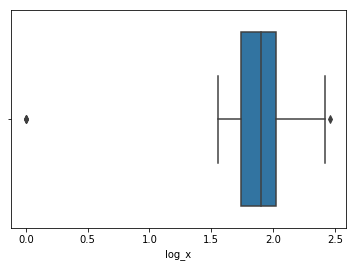

In [0]:
sb.boxplot(X_dummies_log['log_x'])

In [0]:
X_dummies_log.query('log_x == 0')

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z


In [0]:
X_dummies_log = X_dummies_log.drop(axis=0, index=[9734,30141,30804])

In [0]:
Y_dummies_log = Y_dummies_log.drop(axis=0, index=[9734,30141,30804])

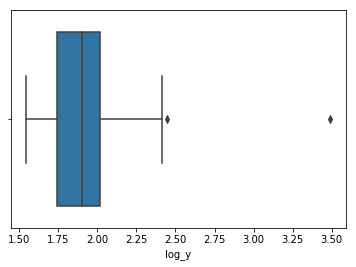

In [0]:
sb.boxplot(X_dummies_log['log_y'])

In [0]:
X_dummies_log.query('log_y > 3.00')

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
2785,61.8,55.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.673345,1.816452,3.490429,1.811562


In [0]:
X_dummies_log = X_dummies_log.drop(axis=0, index=2785)

In [0]:
Y_dummies_log = Y_dummies_log.drop(axis=0, index=2785)

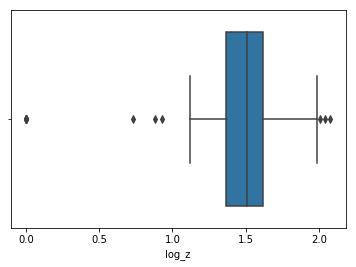

In [0]:
sb.boxplot(X_dummies_log['log_z'])

In [0]:
X_dummies_log.query('log_z == 0.00')

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z
2657,63.0,59.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.095310,2.014903,2.010895,0.0
5589,59.2,58.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.009950,2.014903,2.010895,0.0
12157,59.2,56.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.139762,2.064328,2.057963,0.0
16833,62.7,53.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.703098,2.199444,2.191654,0.0
19721,61.2,59.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.788457,2.242835,2.237513,0.0
24371,58.1,59.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.009950,2.036012,2.028148,0.0
24708,59.1,59.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000000,2.021548,2.012233,0.0
29200,59.4,61.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.779325,2.250239,2.246015,0.0


In [0]:
X_dummies_log = X_dummies_log.drop(axis=0, index=[2657,5589,12157,16833,19721,24371,24708,29200])

In [0]:
Y_dummies_log = Y_dummies_log.drop(axis=0, index=[2657,5589,12157,16833,19721,24371,24708,29200])

In [0]:
X_dummies_log.query('log_z == 0.00')

,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_carat,log_x,log_y,log_z


In [0]:
len(Y_dummies_log)

33928

In [0]:
busca_forest = RandomizedSearchCV(RandomForestRegressor(),
                    espaco_de_parametros_forest, 
                    n_iter = 100,
                    cv = KFold(n_splits = 5))


busca_forest.fit(X_dummies_log, Y_dummies_log)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimato...',
                                                   n_jobs=None, oob_score=False,
 

In [0]:
busca_forest.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=221,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=90,
                      min_weight_fraction_leaf=0.0, n_estimators=16,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
modelo_para_treinar_com_outliers = busca_forest.best_estimator_

In [0]:
modelo_para_treinar_com_outliers.fit(X_dummies_log, Y_dummies_log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=221,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=90,
                      min_weight_fraction_leaf=0.0, n_estimators=16,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
np.exp(modelo_para_treinar_com_outliers.predict(predicao_dummies))

array([13575.48717059,  5313.41224864,  2694.93681567, ...,
        1265.27762997,  2181.79120733,   859.5693924 ])

In [0]:
sample_sub = pd.read_csv('sampleSubmission.csv')

In [0]:
sample_sub.head()

,id,price
0,0,12345.67
1,1,12345.67
2,2,12345.67
3,3,12345.67
4,4,12345.67


In [0]:
sample_sub['price'] = np.exp(modelo_para_treinar_com_outliers.predict(predicao_dummies))

In [0]:
sample_sub = sample_sub.drop(columns = 'id')

In [0]:
sample_sub.head()

,price
0,13575.487171
1,5313.412249
2,2694.936816
3,4846.501184
4,2442.232427


In [0]:
sample_sub.to_csv('PredicaoComLogDummiesTreinadoComOutliersOtimizadoSemOutliers.csv')